# Random Forest Project 
For this project the data I will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). The  lending data is from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

The data includes the following columns:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Importing libraries and data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [3]:
df = pd.read_csv('loan_data.csv')

## Initial look at the data

In [4]:
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [5]:
df.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


**Checking for missing data**
<br />
Before going onto the exploratory analysis, I will check for any missing data.

<AxesSubplot:>

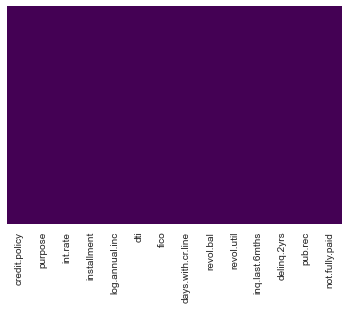

In [28]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

This data looks like it is not missing any data point. Any missing data would be highlighted in yellow. 

## Exploratory Data Analysis
A few relationships that may be of interest are the relations between a customers FICO score and  their loan interest rate, Their Fico score and their credit policy, and how their Fico score, thier policy and their interest rate relate to whether or not they fully paid their loan.

In [19]:
sns.set_style('whitegrid')

In [ ]:
# data dictionary added for clean axis labels

data = pd.DataFrame({
    'FICO Score': df['fico'],
    'Interest Rate (%)': 100*df['int.rate'],
    'Not Fully Paid': df['not.fully.paid'],
    'Credit Policy': df['credit.policy']
    
})

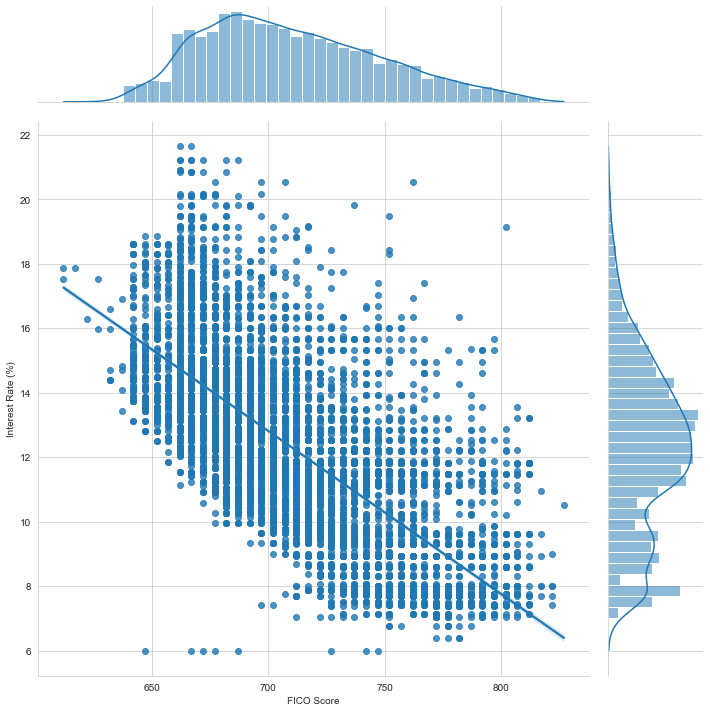

In [25]:
plot = sns.jointplot(x = 'FICO Score', y = 'Interest Rate (%)', data = data, kind="reg", height = 10)


The better a customer's FICO score is the lower their interest tends to be. FICO scores are used as an indicator of how likely a consumer is to repay borrowed money based on their credit history, so this relationship is to be expected. A consumer with a high FICO score is a lower risk investment.

<Figure size 1080x576 with 0 Axes>

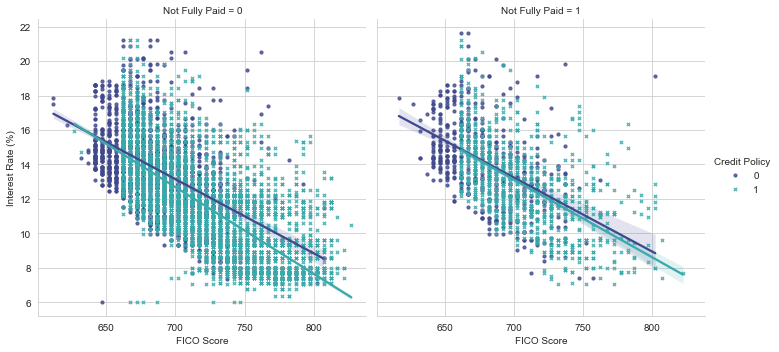

In [29]:
plt.figure(figsize = (15,8))
sns.lmplot(x = 'FICO Score', y = 'Interest Rate (%)', data = data, 
           col = 'Not Fully Paid', hue = 'Credit Policy', markers=["o", "x"], scatter_kws={"s": 10}, palette = "mako" )

A customer is more likely to have fully paid the loan if they have a higher FICO score and if they have a lower interest rate. 

## Preparing the data for Categorical analysis
When looking at the data frame using .info(), the "purpose" column had a data type of "object". Before moving onto building our model this will need to be changed into a integer or float so that Seaborn's algorithm can handle it. A dummy variable will need to be added to the data.

In [30]:
cat_feats = ['purpose']

In [31]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [32]:
# checking that dummy variables are added and not object type
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Creating Train Test Split
The objective is to test whether or not a customer will repay their loan. In this case y = "not.fully.paid" and the X matric will be equal to the dataframe minus the y column.

In [33]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Tree Model
Just for practice and comparision, first I will create a Decsision Tree and train the data to it. 

In [36]:
dtree = DecisionTreeClassifier()

In [37]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Predictions and Evaluation of the Decision Tree model

In [38]:
predictions = dtree.predict(X_test)

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2426
           1       0.23      0.25      0.24       448

    accuracy                           0.75      2874
   macro avg       0.54      0.55      0.54      2874
weighted avg       0.76      0.75      0.75      2874



In [40]:
print(confusion_matrix(y_test,predictions))

[[2045  381]
 [ 337  111]]


This model did okay with a 75% accuracy, however a random forest will most likely result in a much better model.

## Random Forest model
Training the Random Forest model.

In [45]:
rfc = RandomForestClassifier(n_estimators=600)

In [46]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

Just for fun a graphic of the random forest can be found below. Since there are many variables in the model, the grtaphic is quite large, but can be zoomed in for detailed information.

In [41]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(final_data.columns[1:])
features

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_small_business']

In [42]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

### Predictions and Evaluation of the Random Forest model

In [47]:
predictions = rfc.predict(X_test)

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2426
           1       0.26      0.01      0.03       448

    accuracy                           0.84      2874
   macro avg       0.55      0.50      0.47      2874
weighted avg       0.75      0.84      0.77      2874



In [49]:
print(confusion_matrix(y_test,predictions))

[[2409   17]
 [ 442    6]]


There was an 11% increase in accuracy from changing the model from a Descision Tree to a Random Forest. Using this Random Tree model Lending Club could predict if an individual would be able to repay their loan with an 84% accuracy.